In [ ]:
#from google.colab import files

# Upload the zip file
#uploaded = files.upload()

In [1]:
import zipfile
import os

# Assuming the uploaded zip file is named 'myfolder.zip'
zip_path = '/content/archive.zip'
extract_to = '/content/archive'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to {extract_to}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/archive.zip'

In [1]:
for dirname, _, filenames in os.walk('/content/archive.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

NameError: name 'os' is not defined

In [3]:

import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import itertools
import pickle

In [ ]:
#Load data
X_train = []
Y_train = []
X_test= []
Y_test = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [ ]:
# Load training data
for i in labels:
    folderPath = os.path.join('/content/archive/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [ ]:
# Load testing data
for i in labels:
    folderPath = os.path.join('/content/archive/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        Y_test.append(i)

In [ ]:
# Convert lists to numpy arrays
X_train = np.array(X_train) 
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
# Shuffle data
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)

In [ ]:
# Convert labels to categorical
y_train = tf.keras.utils.to_categorical([labels.index(i) for i in Y_train], num_classes=5)
y_test = tf.keras.utils.to_categorical([labels.index(i) for i in Y_test], num_classes=5)

In [ ]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    Dropout(0.3),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Conv2D(128, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Conv2D(128, (3,3), activation='relu'),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Print model summary to verify the shapes
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

Epoch 1/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 452s 6s/step - accuracy: 0.2663 - loss: 1.3672 - val_accuracy: 0.5076 - val_loss: 1.2556
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 503s 6s/step - accuracy: 0.4608 - loss: 1.2347 - val_accuracy: 0.5649 - val_loss: 1.0316
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 492s 6s/step - accuracy: 0.5699 - loss: 0.9754 - val_accuracy: 0.6183 - val_loss: 0.9516
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 440s 6s/step - accuracy: 0.6415 - loss: 0.8582 - val_accuracy: 0.6718 - val_loss: 0.8308
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.6452 - loss: 0.8213 - val_accuracy: 0.6412 - val_loss: 0.8029
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 446s 6s/step - accuracy: 0.6813 - loss: 0.7138 - val_accuracy: 0.6565 - val_loss: 0.7994
Epoch 7/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 456s 6s/step - accuracy: 0.7486 - loss: 0.6449 - val_accuracy: 0.6756 - val_loss: 0.7552
Epoch 8/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 454s 6s/step - accuracy: 0.7834 - loss: 0.5558 - val_accuracy: 0.7290 - v

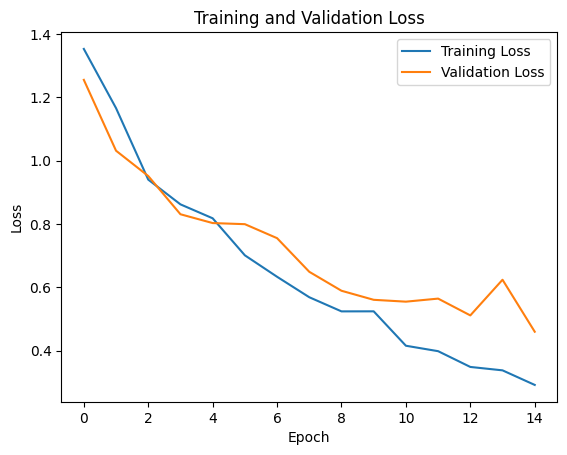

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

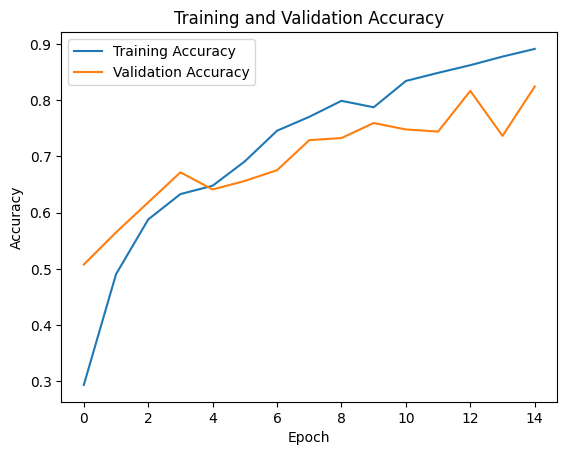

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Validation Accuracy: {:.2f}%".format(val_acc * 100))

21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8176 - loss: 0.5571
Validation Accuracy: 82.70%


In [ ]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step


In [ ]:
# Confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

In [ ]:
#accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)

Accuracy: 82.69525267993875


In [ ]:
# Precision
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.8508181933209434


In [ ]:
# Recall
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.8269525267993875


In [ ]:
# F-score
f_score = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
print("F-Score:", f_score)

F-Score: 0.8240024063721294


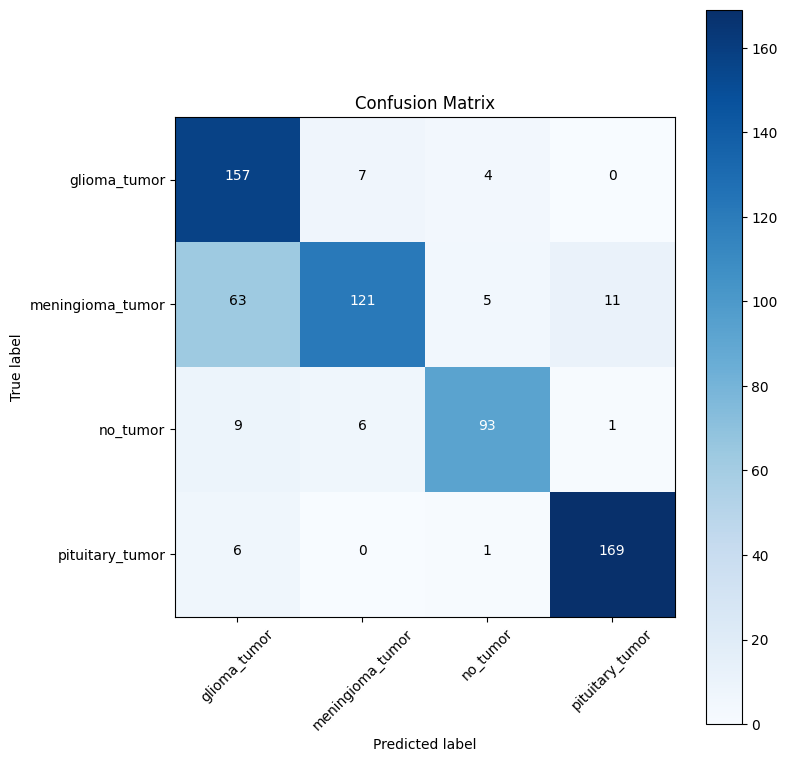

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Predict input image
img = cv2.imread('/content/archive/Testing/meningioma_tumor/image(19).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

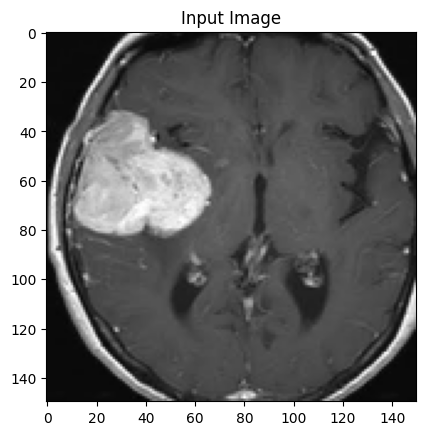

In [ ]:
# Display input image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

In [ ]:
# Predict class of input image
predicted_class = model.predict(img_array)[0]
predicted_label = labels[np.argmax(predicted_class)]
accuracy = np.max(model.predict(img_array)) * 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [ ]:
print(f"The predicted class of the input image is: {predicted_label}")
print(f"The accuracy of prediction is: {accuracy:.2f}%")

The predicted class of the input image is: meningioma_tumor
The accuracy of prediction is: 85.32%


In [ ]:
#import pickle

# Save the trained model to a file
#filename = 'version_model_1.0.pkl'  # Name for the model file

# Replace 'model' with the actual variable name used for your trained model
#with open(filename, 'wb') as file:
 #   pickle.dump(history, file)

#print(f"Model saved successfully to {filename}")

In [ ]:
# Save the model in HDF5 format
model.save('model_new1.h5')

print("Model saved successfully as model_new1.h5")